In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sqlite3
from scipy import stats
from scipy.stats import *

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [2]:

#create the math database as a pands dataframe
df_student_mat = pd.read_csv('student-mat.csv')
df_student_mat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [3]:

#create the portuguese database as a pands dataframe
df_student_por = pd.read_csv('student-por.csv')
df_student_por["alc"] = (df_student_por["Dalc"]+df_student_por["Walc"])/2
df_student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,1.891371
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,0.996206
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,1.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,1.500000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,2.500000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,5.000000


In [4]:
#to only check the same quality of people 
df_smart_0 = df_student_por["failures"] == 0
df_smart = df_student_por[df_smart_0]
df_smart.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,16.575592,2.615665,2.378871,1.533698,1.985428,0.0,3.959927,3.140255,3.167577,1.453552,2.242259,3.513661,3.351548,11.888889,12.102004,12.510018,1.847905
std,1.110758,1.131746,1.098435,0.740668,0.836969,0.0,0.925233,1.046545,1.159366,0.875524,1.266338,1.448097,4.280569,2.583010,2.631327,2.828813,0.968999
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.0,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,11.000000,1.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.0,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,12.000000,1.500000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.0,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,14.000000,14.000000,14.000000,2.500000
max,20.000000,4.000000,4.000000,4.000000,4.000000,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,5.000000


In [5]:
# Create a database only showing the smart students who dont drink in the week
df_clean_0 = df_smart["Dalc"] == 1
df_clean = df_smart[df_clean_0]
df_clean.describe() 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.0,392.000000,392.000000,392.000000,392.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,16.563776,2.602041,2.369898,1.497449,2.061224,0.0,4.028061,3.066327,3.028061,1.0,1.760204,3.459184,3.017857,12.137755,12.352041,12.803571,1.380102
std,1.115349,1.119370,1.093301,0.704384,0.828721,0.0,0.891407,1.019347,1.151771,0.0,0.969429,1.440506,3.701412,2.606583,2.604059,2.807496,0.484715
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.000000,2.000000,1.750000,1.000000,2.000000,0.0,4.000000,2.000000,2.000000,1.0,1.000000,2.000000,0.000000,10.000000,11.000000,11.000000,1.000000
50%,16.000000,2.000000,2.000000,1.000000,2.000000,0.0,4.000000,3.000000,3.000000,1.0,1.000000,4.000000,2.000000,12.000000,12.000000,13.000000,1.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.0,5.000000,4.000000,4.000000,1.0,2.000000,5.000000,4.000000,14.000000,14.000000,15.000000,1.500000
max,20.000000,4.000000,4.000000,4.000000,4.000000,0.0,5.000000,5.000000,5.000000,1.0,5.000000,5.000000,22.000000,19.000000,19.000000,19.000000,3.000000


In [6]:
# Create a database only show the smart students who never drink
df_cleanst_0 = df_clean["Walc"] == 1
df_cleanst = df_clean[df_cleanst_0]
df_cleanst.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.0,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.0
mean,16.415459,2.628019,2.376812,1.526570,2.198068,0.0,4.082126,3.091787,2.782609,1.0,1.0,3.357488,2.425121,12.159420,12.415459,12.864734,1.0
std,1.136915,1.098007,1.098562,0.736048,0.861471,0.0,0.907370,1.017459,1.126075,0.0,0.0,1.464045,2.997239,2.658326,2.571568,2.762626,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,15.000000,2.000000,2.000000,1.000000,2.000000,0.0,4.000000,3.000000,2.000000,1.0,1.0,2.000000,0.000000,10.500000,11.000000,11.000000,1.0
50%,16.000000,2.000000,2.000000,1.000000,2.000000,0.0,4.000000,3.000000,3.000000,1.0,1.0,4.000000,2.000000,12.000000,12.000000,13.000000,1.0
75%,17.000000,4.000000,3.000000,2.000000,3.000000,0.0,5.000000,4.000000,4.000000,1.0,1.0,5.000000,4.000000,14.000000,14.000000,15.000000,1.0
max,19.000000,4.000000,4.000000,4.000000,4.000000,0.0,5.000000,5.000000,5.000000,1.0,1.0,5.000000,16.000000,19.000000,19.000000,19.000000,1.0


In [7]:
# Create a database showing the smart people who drink a lot during the weekdays
df_drunk_0 = df_smart["alc"] == 5
df_drunk = df_smart[df_drunk_0]
df_drunk.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.0,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,16.833333,2.583333,2.583333,1.833333,1.666667,0.0,3.916667,3.916667,4.416667,5.0,5.0,3.750000,4.666667,9.833333,10.500000,10.916667,5.0
std,0.937437,1.240112,1.164500,1.193416,1.154701,0.0,1.240112,1.505042,0.996205,0.0,0.0,1.215431,4.030189,2.724746,2.276361,2.937480,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,2.000000,5.0,5.0,1.000000,0.000000,5.000000,6.000000,6.000000,5.0
25%,16.000000,1.750000,2.000000,1.000000,1.000000,0.0,4.000000,3.750000,4.000000,5.0,5.0,3.000000,1.500000,8.750000,10.000000,9.000000,5.0
50%,17.000000,2.500000,2.000000,1.000000,1.000000,0.0,4.000000,4.500000,5.000000,5.0,5.0,4.000000,4.000000,10.000000,10.000000,11.000000,5.0
75%,17.250000,4.000000,4.000000,2.250000,2.000000,0.0,5.000000,5.000000,5.000000,5.0,5.0,5.000000,8.000000,11.000000,11.000000,12.000000,5.0
max,18.000000,4.000000,4.000000,4.000000,4.000000,0.0,5.000000,5.000000,5.000000,5.0,5.0,5.000000,12.000000,16.000000,16.000000,16.000000,5.0


In [8]:

# Create 2 pandas datframes one with only the males and one with only females
df_male_0 = df_student_por["sex"] == "M"
df_female_0 = df_student_por["sex"] == "F"
df_male = df_student_por[df_male_0]
df_female = df_student_por[df_female_0]
male_dalc = sm.stats.DescrStatsW(df_male['Dalc'])
male_walc = sm.stats.DescrStatsW(df_male['Walc'])
male_alc = sm.stats.DescrStatsW(df_male['alc'])

In [9]:
#creating the values for the t-test
female_dalc = sm.stats.DescrStatsW(df_female['Dalc'])
female_walc = sm.stats.DescrStatsW(df_female['Walc'])
female_alc = sm.stats.DescrStatsW(df_female['alc'])

In [10]:
#creating the values for the t-test
cm_dalc = sm.stats.CompareMeans(male_dalc,female_dalc)
cm_walc = sm.stats.CompareMeans(male_walc, female_walc)
cm_alc = sm.stats.CompareMeans(male_alc, female_alc)


In [11]:
#doing the t-test for weekdays
ttest_dalc = cm_dalc.ttest_ind(alternative='larger')
ttest_dalc[1]

1.0829598506321399e-13

In [12]:
#doing the t-test for weekend days
ttest_walc = cm_walc.ttest_ind(alternative='larger')
ttest_walc[1]

2.672943591556592e-17

In [13]:
#doing the t-test for all days
ttest_alc = cm_alc.ttest_ind(alternative='larger')
ttest_alc[1]

4.1329923437750136e-19

In [14]:
#t-test 1 vs 5

clean_grade = sm.stats.DescrStatsW(df_cleanst['G3'])
drunk_grade = sm.stats.DescrStatsW(df_drunk['G3'])
cm = sm.stats.CompareMeans(clean_grade,drunk_grade)
ttest_grade = cm.ttest_ind(alternative='larger')
ttest_grade[1]

0.009405514502596078

In [15]:
#t-test 1 vs (2,3,4,5)
df_not_sober_0 = df_smart["Dalc"] + df_smart["Walc"] != 2
df_not_sober = df_smart[df_not_sober_0]
not_sober_grade = sm.stats.DescrStatsW(df_not_sober['G3'])
cm = sm.stats.CompareMeans(clean_grade,not_sober_grade)
ttest_grade = cm.ttest_ind(alternative='larger')
ttest_grade[1]

0.011065179471651703

In [16]:
#compare male
df_male.iloc[:,[26,27,33]].describe()

,Dalc,Walc,alc
count,266.000000,266.000000,266.000000
mean,1.815789,2.774436,2.295113
std,1.139304,1.414835,1.168104
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,3.000000,2.000000
75%,2.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000


In [17]:
#to female
df_female.iloc[:,[26,27,33]].describe()

,Dalc,Walc,alc
count,383.000000,383.000000,383.000000
mean,1.284595,1.937337,1.610966
std,0.659166,1.059112,0.737964
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,2.000000,1.500000
75%,1.000000,3.000000,2.000000
max,5.000000,5.000000,5.000000


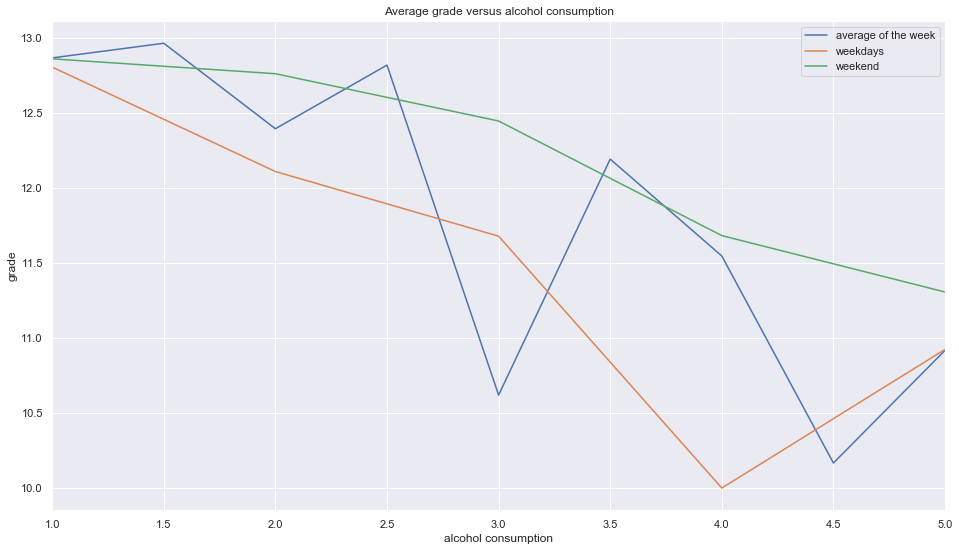

In [18]:
#plot weekdays,weekend, week in one graph

fig, ax = plt.subplots()

df_0 = df_smart.groupby(['alc']).mean()
df_1 = df_smart.groupby(['Dalc']).mean()
df = df_smart.groupby(['Walc']).mean()
df_0.plot( y = 'G3',ax=ax,figsize =(16,9));
df_1.plot( y = 'G3',ax=ax);
df.plot( y = 'G3',ax=ax);
ax.legend(["average of the week",'weekdays','weekend']);
ax.set_xlabel("alcohol consumption");
ax.set_ylabel("grade");
ax.set_title("Average grade versus alcohol consumption");
plt.savefig('graph.png')

In [19]:
#t-test (1,2,3,4) vs 5
df_not_drunk_0 = df_smart["alc"] != 5
df_not_sober = df_smart[df_not_drunk_0]
not_sober_grade = sm.stats.DescrStatsW(df_not_sober['G3'])
cm = sm.stats.CompareMeans(not_sober_grade,drunk_grade)
ttest_grade = cm.ttest_ind(alternative='larger')
ttest_grade[1]

0.024209380357204175